In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train =np.array([[160,65],[170,85],[185,85],[188,82],[155,50],[161,58],[180,68],[157,52],[170,66]])
y_train =['K','E','E','E','K','K','E','K','K']

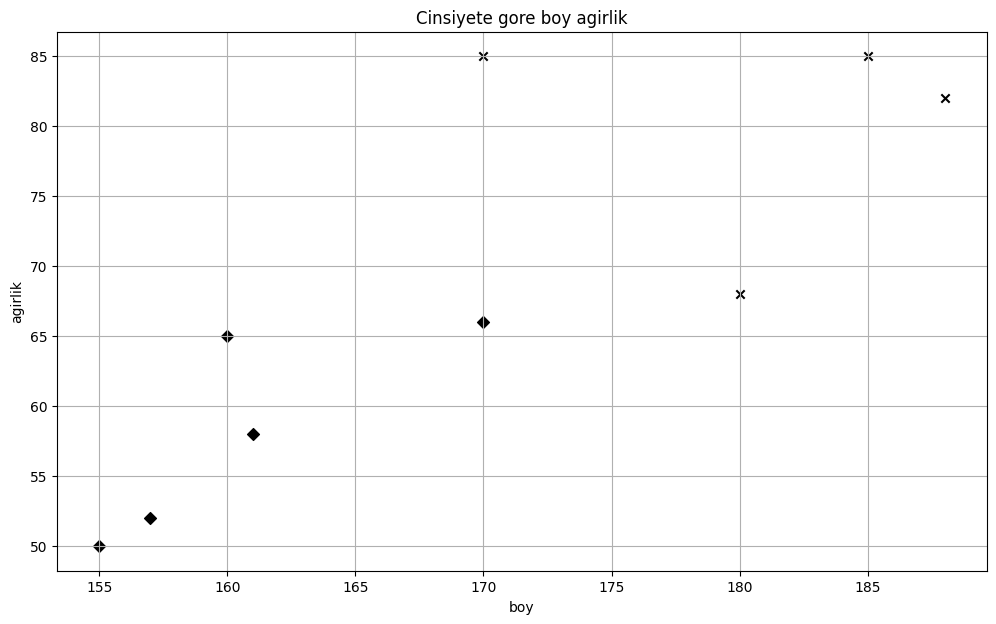

In [3]:
plt.figure(figsize=(12,7))
plt.title('Cinsiyete gore boy agirlik')
plt.xlabel('boy')
plt.ylabel('agirlik')
for i,x in enumerate(x_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i]=='E'else 'D')
plt.grid(True)
plt.show()

In [4]:
from sklearn.preprocessing import LabelBinarizer
lb= LabelBinarizer()
y_train= lb.fit_transform(y_train)
y_train
y_train = y_train.ravel()  # y_train'i (n_samples,) şekline getirir



In [5]:
from sklearn import neighbors

n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors,weights='distance') 
clf.fit(x_train,y_train)


x= np.array([[170,75]])

In [6]:
tahmin = clf.predict(x)
print(tahmin)

etiket_tahmini = lb.inverse_transform(tahmin)
print(etiket_tahmini)

[0]
['E']


In [7]:
x_test = np.array([[170,75],[180,95],[160,50],[165,62],[167,88]])
y_test = ['E','E','K','K','K']


y_test = lb.transform(y_test)
y_tahmin = clf.predict(x_test)
tahmin_edilen_etiketler = lb.inverse_transform(y_tahmin)
print(tahmin)

[0]


In [8]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,recall_score ,f1_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_tahmin)
cm

array([[2, 0],
       [1, 2]], dtype=int64)

In [9]:
accuracy_score(y_test,y_tahmin)

0.8

In [10]:
precision_score(y_test,y_tahmin)

1.0

In [11]:
recall_score(y_test,y_tahmin)

0.6666666666666666

In [12]:
f1_score(y_test,y_tahmin)

0.8

In [13]:
# Hepsini toplu cagirmak istersen.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_tahmin))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



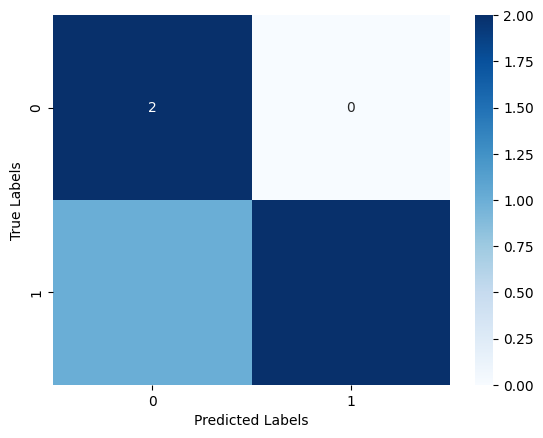

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()